## ANN for real-world application development 

### **i. Applying a Multilayer Neural Network (MLP)**

A multilayer neural network, or MLP, is applied to this classification task by processing the image data through a series of connected layers.

1.  **Input Layer:** The raw data for a single handwritten digit is a 28x28 pixel grayscale image. To feed this into the network, we **flatten** the 2D image into a 1D vector. This means the input layer will have $28 \times 28 = 784$ neurons. Each neuron corresponds to one pixel's intensity value (typically a number from 0 to 255).

2.  **Hidden Layers:** Between the input and output layers, one or more hidden layers are placed. These layers are the core of the learning process. Each neuron in a hidden layer receives inputs from all neurons in the previous layer. It calculates a weighted sum of these inputs, adds a bias, and then passes the result through an activation function. These layers learn progressively more complex features from the pixel data. For instance, the first hidden layer might learn to recognize simple edges and curves, while a second hidden layer might learn to combine those edges to form parts of digits like loops (for an '8') or straight lines (for a '1' or '7').

3.  **Output Layer:** Since there are 10 possible digits (0 through 9), the output layer must have **10 neurons**. Each neuron corresponds to one digit class. After processing, the neuron with the highest activation value indicates the model's prediction. For example, if the 8th neuron (representing the digit '7') has the highest value, the model predicts the input image is a '7'. A special activation function called Softmax is used here to convert these raw values into a probability distribution, showing the model's confidence for each digit.



---

### **ii. Justification of Design Choices**

The specific architecture of an MLP involves several key decisions, each with a clear justification.

* **Number of Layers:** A common starting point for MNIST is **two hidden layers**.
    * **Justification:** While one hidden layer is theoretically enough to approximate any function (Universal Approximation Theorem), using two often leads to better performance with fewer total neurons. The first layer learns low-level features (edges), and the second learns higher-level features (combinations of edges), creating a hierarchical representation of the data. This depth is sufficient for the complexity of MNIST without being overly prone to issues like vanishing gradients or excessive training time. A typical architecture might be **784 (input) -> 128 (hidden 1) -> 64 (hidden 2) -> 10 (output)**. The funnel-like structure forces the network to learn compressed, meaningful features.

* **Activation Functions:**
    * **Hidden Layers: ReLU (Rectified Linear Unit)**. The function is $f(x) = \max(0, x)$.
        * **Justification:** ReLU is the modern default for hidden layers because it's computationally simple and helps mitigate the **vanishing gradient problem**. Older functions like sigmoid or tanh can saturate (their gradients become close to zero for large positive or negative inputs), which slows down or halts the learning process in deep networks. ReLU doesn't have this issue for positive inputs, leading to faster training.
    * **Output Layer: Softmax**.
        * **Justification:** For multi-class classification, Softmax is essential. It takes the raw output scores (logits) from the 10 output neurons and transforms them into a probability distribution where all values are between 0 and 1 and sum up to 1. This gives a clear, interpretable output, such as "85% probability it's a 9, 10% it's a 4, etc."

* **Optimizer: Adam (Adaptive Moment Estimation)**.
    * **Justification:** Adam is an efficient and widely used optimization algorithm that adapts the learning rate for each network parameter individually. It combines the advantages of other optimizers like Momentum (which helps accelerate gradient descent in the right direction) and RMSprop (which adapts the learning rate). This generally leads to **faster convergence** and better performance compared to standard Stochastic Gradient Descent (SGD).

---

### **iii. Experimental Evaluation**

To ensure the model is reliable and generalizes well to new, unseen data, a rigorous evaluation process is crucial.

1.  **Data Splitting:** The first step is to split the dataset into three independent sets:
    * **Training Set (e.g., 80%):** The data used to train the model by adjusting its weights and biases.
    * **Validation Set (e.g., 10%):** Used *during* training to tune hyperparameters (like the learning rate or number of neurons) and for early stopping. The model's performance on this set guides the development process. If performance on the validation set stops improving or gets worse while training performance continues to improve, it's a sign of **overfitting**.
    * **Test Set (e.g., 10%):** A completely unseen dataset that is used only **once** after all training and tuning are complete. This provides an unbiased estimate of the model's performance on real-world data, measuring its ability to generalize.

2.  **Evaluation Metrics:**
    * **Accuracy:** For a balanced dataset like MNIST, accuracy (the percentage of digits classified correctly) is the most intuitive metric.
    * **Confusion Matrix:** This is a powerful tool that shows not just *how many* errors the model made, but also *what kind* of errors. For example, a confusion matrix might reveal that the model frequently confuses the digit '3' with '8' or '9' with '4'. This provides insight into the model's specific weaknesses. 
    * **Precision, Recall, and F1-Score:** These metrics provide a more detailed performance breakdown for each individual digit class, which is especially useful if one class is harder to predict than others.

3.  **Techniques for Reliability:**
    * **k-Fold Cross-Validation:** For a more robust evaluation, instead of a single train/validation split, we can use k-fold cross-validation. The training data is split into 'k' folds (e.g., 5 or 10). The model is trained k times, each time using a different fold as the validation set and the remaining k-1 folds for training. The final performance is the average across all k folds. This ensures that the model's performance is not just a lucky result of one particular data split.
    * **Learning Curves:** Plotting the model's accuracy and loss on both the training and validation sets over each epoch (training cycle). These curves are crucial for diagnosing problems. A large gap between the training and validation curves indicates overfitting, meaning the model has memorized the training data but cannot generalize.


Using TensorFlow version: 2.19.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ First_hidden_layer (Dense)      │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Second_hidden_layer (Dense)     │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8790 - loss: 0.4224 - val_accuracy: 0.9581 - val_loss: 0.1287
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.9671 - loss: 0.1090 - val_accuracy: 0.9699 - val_loss: 0.0961
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9761 - loss: 0.0783 - val_accuracy: 0.9707 - val_loss: 0.0895
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9835 - loss: 0.0518 - val_accuracy: 0.9742 - val_loss: 0.0876
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.9862 - loss: 0.0414 - val_accuracy: 0.9746 - val_loss: 0.0826
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9895 - loss: 0.0314 - val_accuracy: 0.9757 - val_loss: 0.0847
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9916 - loss: 0.0261 - val_accuracy: 0.9759 - val_loss: 0.0934
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/st

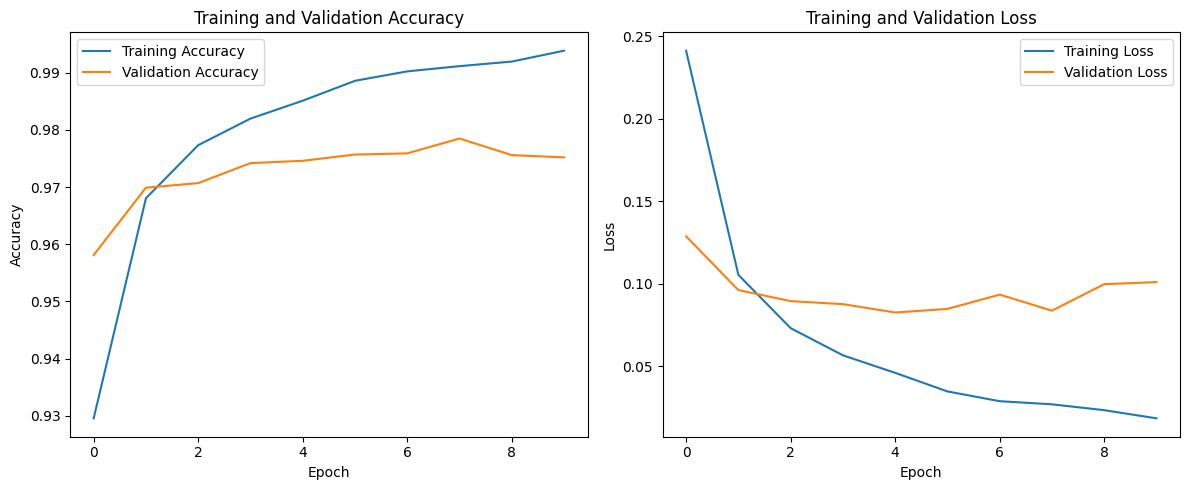

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


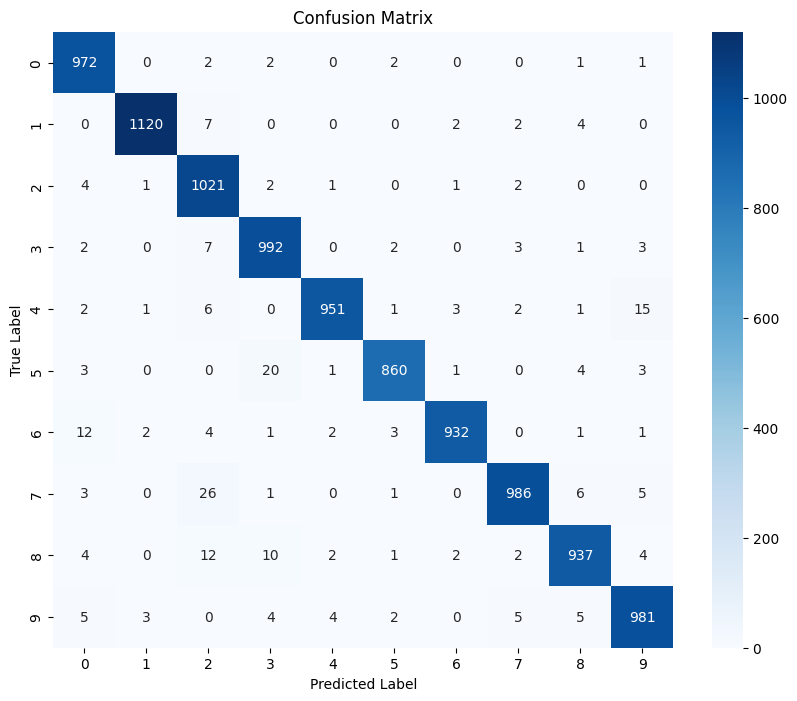

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print(f"Using TensorFlow version: {tf.__version__}")


# 2. LOAD AND PREPROCESS THE DATA
# Load the MNIST dataset, which is conveniently included in Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values from the 0-255 range to the 0-1 range.
# This helps the network train more efficiently.
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels.
# This converts a class vector (integers) to a binary class matrix.
# For example, the digit '5' becomes [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## 3. BUILD THE MULTILAYER NEURAL NETWORK
# We'll use the exact architecture justified in the explanation:
# 784 (input) -> 128 (hidden 1) -> 64 (hidden 2) -> 10 (output)

model = Sequential([
    # Flatten the 28x28 images into a 784-dimensional vector
    Flatten(input_shape=(28, 28), name ='Input_layer'),
    
    # First hidden layer with 128 neurons and ReLU activation
    Dense(128, activation='relu', name = 'First_hidden_layer'),
    
    # Second hidden layer with 64 neurons and ReLU activation
    Dense(64, activation='relu',name = 'Second_hidden_layer'),
    
    # Output layer with 10 neurons (one for each digit) and Softmax activation
    Dense(num_classes, activation='softmax',name = 'Output_layer')
])

# Display a summary of the model's architecture
model.summary()


## 4. COMPILE THE MODEL
# Here we configure the model for training by specifying the optimizer,
# loss function, and metrics.

model.compile(
    optimizer='adam',  # Adam optimizer for efficient gradient descent
    loss='categorical_crossentropy',  # Standard loss function for multi-class classification
    metrics=['accuracy']  # Metric to monitor during training
)



## 5. TRAIN THE MODEL
# Now we fit the model to the training data.
# We'll use the test set as our validation data to monitor for overfitting.

print("\nStarting model training...")
history = model.fit(
    x_train, 
    y_train,
    epochs=10,  # Number of times to iterate over the entire dataset
    batch_size=32,  # Number of samples per gradient update
    validation_data=(x_test, y_test),
    verbose=1 # Show progress bar
)
print("Model training finished.")


## 6. EVALUATE THE MODEL
# Finally, we evaluate the model's performance on the unseen test set
# to get an unbiased measure of its generalization ability.

print("\nEvaluating model on the test set...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


## 7. VISUALIZE PERFORMANCE

# Plotting training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Generate a confusion matrix to see what kind of errors the model is making
# Get model predictions for the test set
y_pred_probabilities = model.predict(x_test)
# Convert probabilities to predicted class labels
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
# Convert one-hot encoded true labels back to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


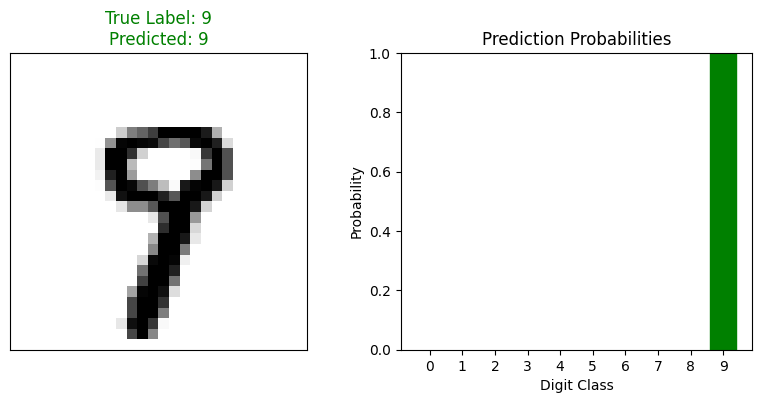

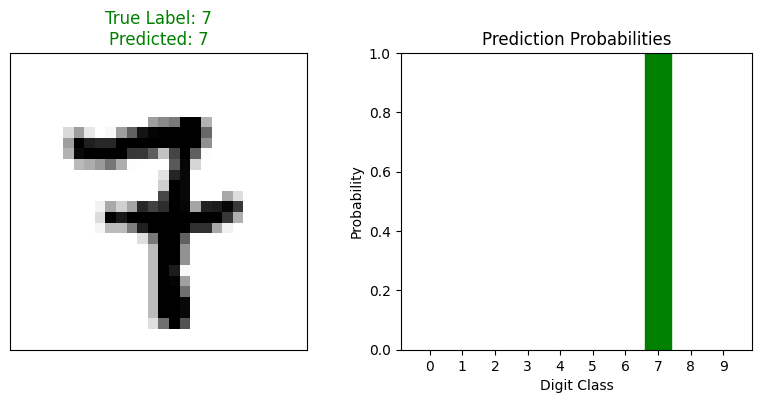

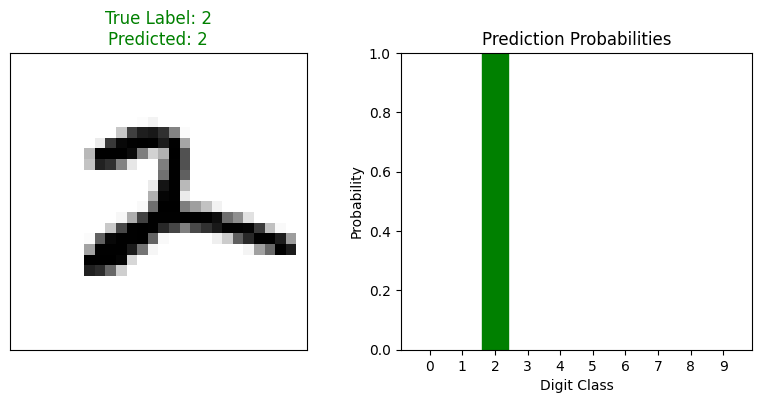

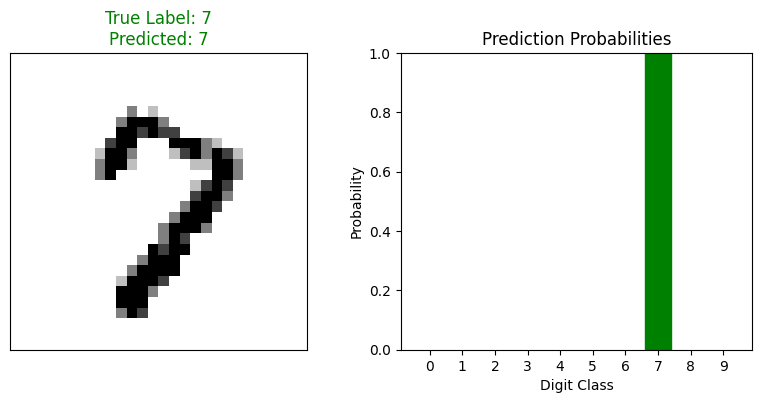

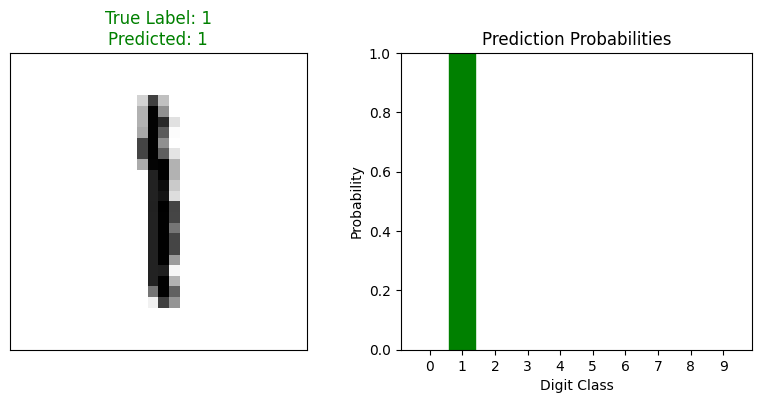

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions for the entire test set
y_pred_probabilities = model.predict(x_test)
# Convert probabilities to predicted class labels
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
# Get the true labels
y_true_classes = np.argmax(y_test, axis=1)

# --- Function to plot the image and the prediction probabilities ---
def plot_prediction(index):
    
    image = x_test[index]
    true_label = y_true_classes[index]
    pred_label = y_pred_classes[index]
    probabilities = y_pred_probabilities[index]
    
    plt.figure(figsize=(8, 4))
    
    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f"True Label: {true_label}\nPredicted: {pred_label}", 
              color='green' if pred_label == true_label else 'red')
    plt.xticks([])
    plt.yticks([])
    
    # Plot the probability bar chart
    plt.subplot(1, 2, 2)
    bar_plot = plt.bar(range(10), probabilities, color="#777777")
    plt.ylim([0, 1])
    plt.title("Prediction Probabilities")
    plt.xlabel("Digit Class")
    plt.ylabel("Probability")
    plt.xticks(range(10))
    
    # Highlight the predicted and true labels
    bar_plot[pred_label].set_color('red')
    bar_plot[true_label].set_color('green')
    
    plt.tight_layout()
    plt.show()

# Select a few random indices from the test set
num_images_to_show = 5
random_indices = np.random.choice(len(x_test), num_images_to_show, replace=False)

for i in random_indices:
    plot_prediction(i)